In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/DL/sign_mnist_train.csv")

In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/DL/sign_mnist_test.csv')

<Axes: xlabel='label', ylabel='count'>

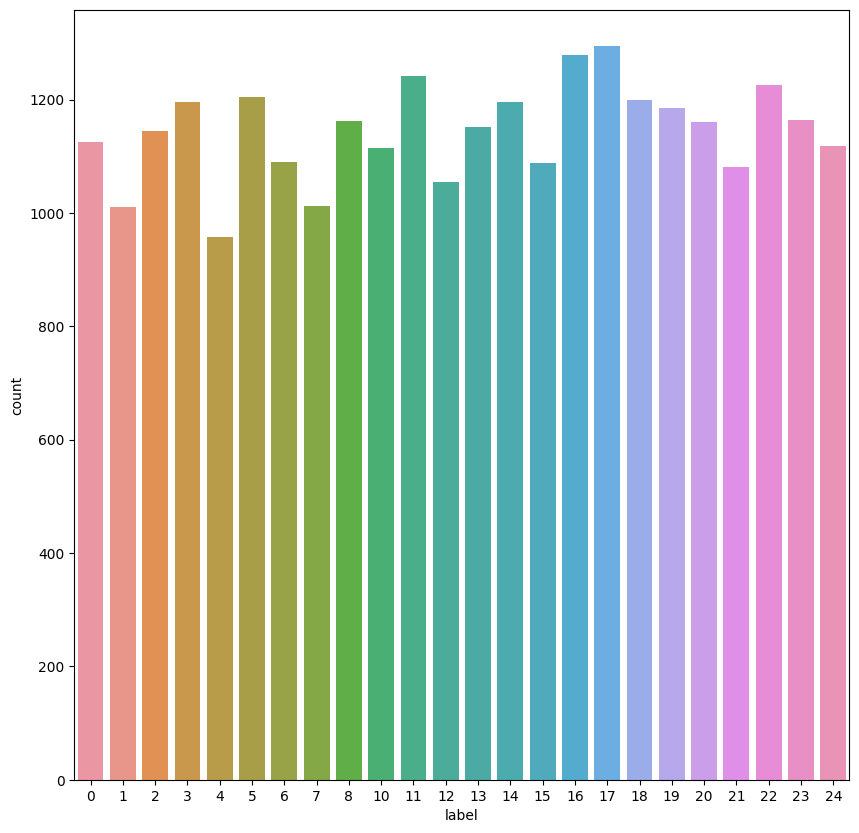

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label')

In [7]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
labels = y_train.unique().tolist()
labels.sort()
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [9]:
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

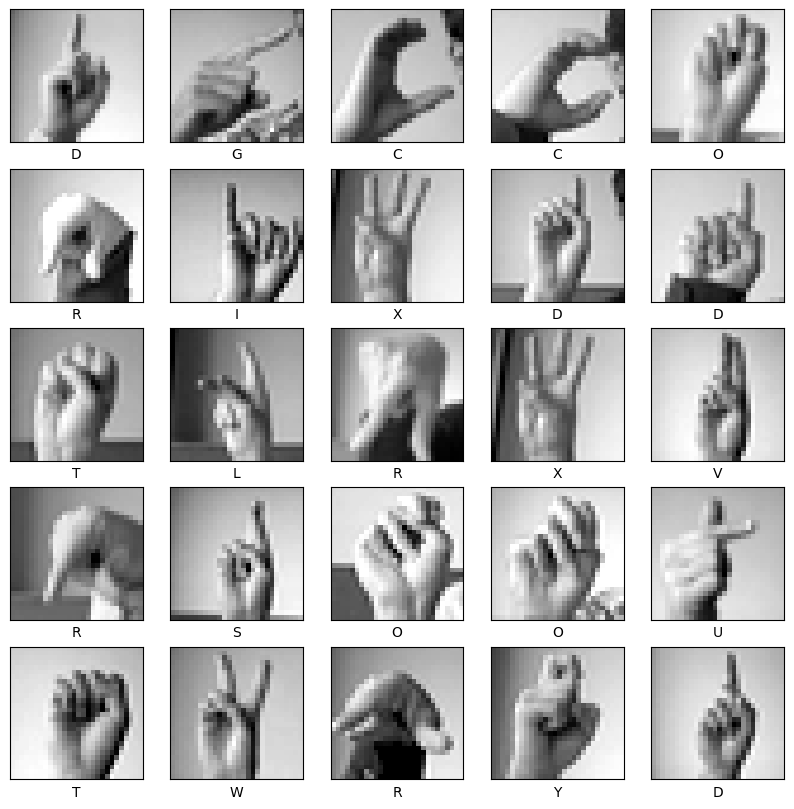

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

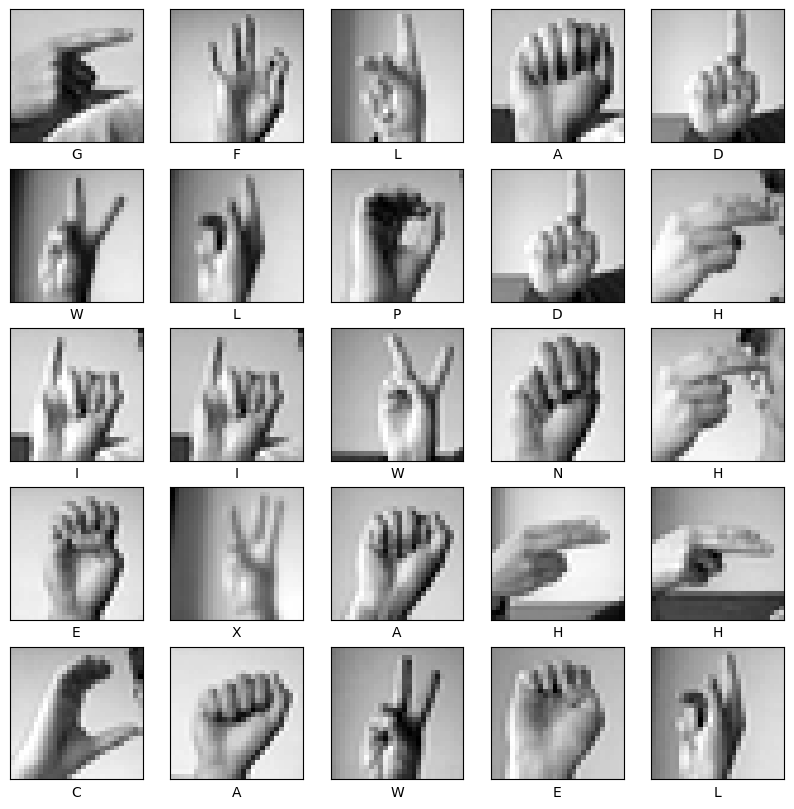

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

In [12]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

In [13]:
y_train_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [14]:
y_train_binarized.shape

(27455, 24)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
172/172 [==============================] - 63s 354ms/step - loss: 2.8832 - accuracy: 0.1356 - val_loss: 1.8313 - val_accuracy: 0.5456
Epoch 2/10
172/172 [==============================] - 60s 347ms/step - loss: 1.7644 - accuracy: 0.4248 - val_loss: 0.8189 - val_accuracy: 0.8345
Epoch 3/10
172/172 [==============================] - 58s 340ms/step - loss: 1.2682 - accuracy: 0.5599 - val_loss: 0.4664 - val_accuracy: 0.9091
Epoch 4/10
172/172 [==============================] - 61s 356ms/step - loss: 0.9899 - accuracy: 0.6472 - val_loss: 0.2974 - val_accuracy: 0.9241
Epoch 5/10
172/172 [==============================] - 59s 340ms/step - loss: 0.7648 - accuracy: 0.7256 - val_loss: 0.1914 - val_accuracy: 0.9751
Epoch 6/10
172/172 [==============================] - 58s 337ms/step - loss: 0.6159 - accuracy: 0.7763 - val_loss: 0.1338 - val_accuracy: 0.9860
Epoch 7/10
172/172 [==============================] - 57s 334ms/step - loss: 0.5381 - accuracy: 0.8040 - val_loss: 0.0997 - val_ac

In [18]:
model.evaluate(X_test, y_test_binarized)

225/225 [==============================] - 4s 18ms/step - loss: 0.2670 - accuracy: 0.9142


[0.26701462268829346, 0.914249837398529]

225/225 - 4s - loss: 0.2670 - accuracy: 0.9142 - 4s/epoch - 16ms/step


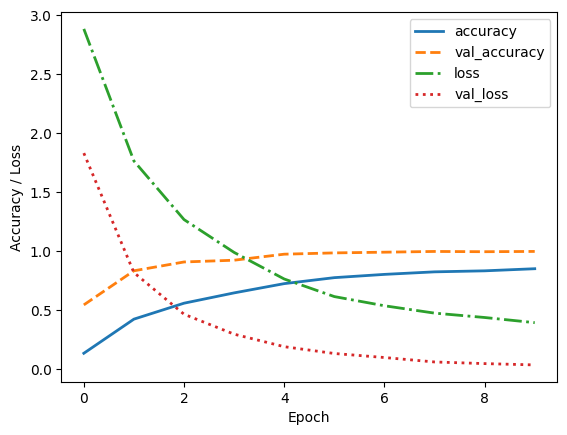

In [19]:
plt.plot(history.history['accuracy'], label='accuracy', linestyle='-', linewidth=2)  # Solid line
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--', linewidth=2)  # Dashed line
plt.plot(history.history['loss'], label='loss', linestyle='-.', linewidth=2)  # Dash-dot line
plt.plot(history.history['val_loss'], label='val_loss', linestyle=':', linewidth=2)  # Dotted line

plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test, y_test_binarized, verbose=2)

In [20]:
print(f'Test accuracy is {test_acc * 100:.2f}%')

Test accuracy is 91.42%


1/1 [==============================] - 0s 118ms/step


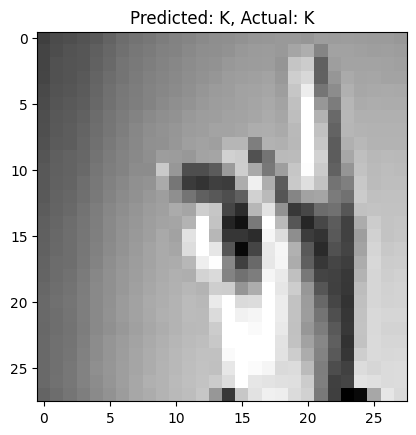

In [21]:
rand_idx = np.random.randint(0, len(X_test))

image = X_test[rand_idx]
label = y_test[rand_idx]

prediction = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {classes[predicted_class]}, Actual: {classes[label] if label < 9 else classes[label - 1]}')
plt.show()